<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

## What is SVG?

* **SVG (Scalable Vector Graphics)** is an **XML** format for 2D graphics (resolution-independent, searchable, stylable).
* Renders natively in all modern browsers; ideal for **icons, logos, charts, diagrams, UI overlays**, and **annotation layers** over Canvas/WebGL.

---

## Core advantages & tradeoffs

| Topic         | Why it matters                              | Tips                                                              |
| ------------- | ------------------------------------------- | ----------------------------------------------------------------- |
| Scalability   | No pixelation on zoom                       | Prefer SVG for crisp UI, charts, text                             |
| Styling       | Works with **CSS** + inline styles          | Use classes for reuse (`.stroke-2`, `.muted`)                     |
| Interactivity | JS events, hover states, SMIL/CSS animation | Keep DOM small; batch updates                                     |
| Accessibility | Real text & titles/readers                  | Use `<title>`, `<desc>`, `role`, `aria-*`                         |
| File size     | Often smaller than PNG for simple art       | Minify; gzip (`.svgz`)                                            |
| Performance   | DOM can get heavy for 10k+ nodes            | Use `<use>`, simplify paths; swap to Canvas for very dense scenes |

---

## Essential building blocks

### Coordinate system & responsiveness

* Use **`viewBox="minX minY width height"`** to define drawing coords.
* Make it responsive: set `width="100%"` and rely on `viewBox` for scaling (omit fixed height or control via CSS).

```xml
<svg viewBox="0 0 400 200" width="100%" xmlns="http://www.w3.org/2000/svg">
  <!-- content -->
</svg>
```

### Shapes & paths (the core tags)

| Element      | Key attributes           | Notes                         |
| ------------ | ------------------------ | ----------------------------- |
| `<rect>`     | `x y width height rx ry` | Rounded corners via `rx/ry`   |
| `<circle>`   | `cx cy r`                | Perfect for nodes/dots        |
| `<ellipse>`  | `cx cy rx ry`            | Scalable circles              |
| `<line>`     | `x1 y1 x2 y2`            | Simple segment                |
| `<polyline>` | `points`                 | Open shape                    |
| `<polygon>`  | `points`                 | Auto-closed shape             |
| `<path>`     | `d`                      | Powerful Bézier curves & arcs |

**Path command mini-cheat**

* `M x y` move; `L x y` line; `H x`/`V y` axis lines
* `C x1 y1 x2 y2 x y` cubic; `Q x1 y1 x y` quadratic
* `A rx ry rot large-arc sweep x y` arc; `Z` close path

### Styling

* Inline: `fill`, `stroke`, `stroke-width`, `opacity`
* CSS: target classes/IDs for reusable styles.

```xml
<style>
  .muted { stroke: #94a3b8; fill: none; }
</style>
<path class="muted" d="M10 10 L190 10"/>
```

### Definitions & reuse

* Put assets in `<defs>`: gradients, filters, symbols, clip/mask.
* Reuse with `<use href="#symbolId" />`.

### Text & labels

* `<text x y>`, `<tspan>` for subspans, `<textPath>` to flow along a curve.
* For charts/diagrams: set `text-anchor="middle"` and `dominant-baseline="middle"` for centering.

---

## Effects & animation

* **Gradients/Patterns**: `<linearGradient>`, `<radialGradient>`, `<pattern>`
* **Filters**: `<feGaussianBlur>`, `<feDropShadow>`, `<feColorMatrix>` …
* **Animations**:

  * **SMIL** (built-in): `<animate>`, `<animateTransform>`
  * **CSS animations**: for properties that are CSS-animatable
  * **JavaScript/D3**: full control + data-binding

Example SMIL:

```xml
<circle cx="40" cy="40" r="10" fill="tomato">
  <animate attributeName="cx" dur="2s" values="40;160;40" repeatCount="indefinite"/>
</circle>
```

---

## Accessibility & security

* Add `<title>` and `<desc>` as first children for screen readers.
* Avoid untrusted inline scripts in SVG; **sanitize user-uploaded SVGs**.
* For decorative SVGs: `role="img"` + `aria-hidden="true"` (if appropriate).

---

## Optimizing & production tips

* **Minify** (SVGO) and **gzip** (`.svgz`).
* Break complex art into smaller symbols; instantiate via `<use>`.
* Convert extremely dense layers to **Canvas/WebGL**, overlay **SVG** for crisp labels.
* When embedding in web apps:

  * **Inline** (`<svg>…</svg>`) for full CSS/JS control.
  * **`<img src="…">`** when you want it static and sandboxed.
  * **React**: import as component or inline in JSX.

---

## Python example: generate a responsive SVG bar chart (pure stdlib)

**Works in JupyterLab** (and anywhere Python runs). Produces an SVG string and writes to file.

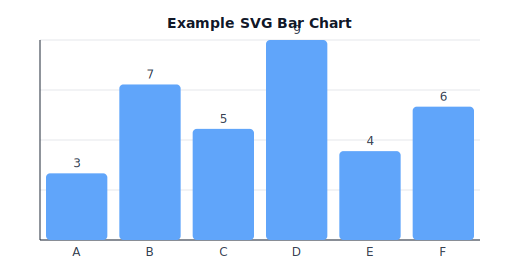

In [ ]:
from xml.etree.ElementTree import Element, SubElement, tostring
from IPython.display import SVG, display  # Optional: for Jupyter inline display

def svg_bar_chart(
    values, labels=None, width=520, height=280, margin=40, colors=None, title=None
):
    """Return an SVG string for a responsive bar chart."""
    labels = labels or [str(i+1) for i in range(len(values))]
    max_v = max(values) if values else 1
    plot_w = width - 2 * margin
    plot_h = height - 2 * margin
    bar_w = plot_w / max(len(values), 1)

    svg = Element("svg", {
        "xmlns": "http://www.w3.org/2000/svg",
        "viewBox": f"0 0 {width} {height}",
        "width": "100%"  # responsive
    })

    # Styles (scoped to this SVG)
    style = SubElement(svg, "style")
    style.text = """
    .axis { stroke: #1f2937; stroke-width: 1; }
    .grid { stroke: #e5e7eb; stroke-width: 1; }
    .label { fill: #374151; font: 12px/1.2 DejaVu Sans, Arial; }
    .title { fill: #111827; font: bold 14px/1.2 DejaVu Sans, Arial; }
    """

    # Background
    SubElement(svg, "rect", {"x": "0", "y": "0", "width": str(width), "height": str(height), "fill": "#ffffff"})

    # Grid (y)
    for gy in range(5):
        y = margin + (gy * plot_h / 4.0)
        SubElement(svg, "line", {"x1": str(margin), "y1": f"{y:.2f}",
                                 "x2": str(width - margin), "y2": f"{y:.2f}",
                                 "class": "grid"})

    # Axes
    SubElement(svg, "line", {"x1": str(margin), "y1": str(height - margin),
                             "x2": str(width - margin), "y2": str(height - margin),
                             "class": "axis"})
    SubElement(svg, "line", {"x1": str(margin), "y1": str(margin),
                             "x2": str(margin), "y2": str(height - margin),
                             "class": "axis"})

    # Bars
    for i, v in enumerate(values):
        # Height proportional to value
        bh = 0 if max_v == 0 else (v / max_v) * plot_h
        x = margin + i * bar_w + 6
        y = (height - margin) - bh
        fill = (colors[i % len(colors)] if colors else "#60a5fa")  # default blue-ish
        SubElement(svg, "rect", {
            "x": f"{x:.2f}", "y": f"{y:.2f}",
            "width": f"{bar_w - 12:.2f}", "height": f"{bh:.2f}",
            "fill": fill, "rx": "4", "ry": "4"
        })
        # X labels
        SubElement(svg, "text", {
            "x": f"{x + (bar_w - 12)/2:.2f}",
            "y": f"{height - margin + 16:.2f}",
            "text-anchor": "middle",
            "class": "label"
        }).text = labels[i]
        # Value labels
        SubElement(svg, "text", {
            "x": f"{x + (bar_w - 12)/2:.2f}",
            "y": f"{y - 6:.2f}",
            "text-anchor": "middle",
            "class": "label"
        }).text = str(v)

    # Title
    if title:
        SubElement(svg, "text", {
            "x": f"{width/2:.2f}", "y": f"{margin - 12:.2f}",
            "text-anchor": "middle", "class": "title"
        }).text = title

    return tostring(svg, encoding="unicode")

# --- Example usage ---
vals = [3, 7, 5, 9, 4, 6]
labs = ["A", "B", "C", "D", "E", "F"]
svg_str = svg_bar_chart(vals, labs, title="Example SVG Bar Chart")

# Save to file
with open("chart.svg", "w", encoding="utf-8") as f:
    f.write(svg_str)

# In JupyterLab, render inline:
display(SVG(data=svg_str))

**Why this approach?**

* Zero dependencies (stdlib `xml.etree.ElementTree`).
* **Responsive** via `viewBox + width="100%"`.
* Easy to extend (tooltips, `<title>`, animations, gradients).

---

## Advanced features you’ll likely use next

* **Markers** (arrows): use `<marker>` in `<defs>` and `marker-end="url(#id)"`.
* **Text along curves**: define a path (`<path id="wave" d="…">`) then `<textPath href="#wave">`.
* **Masks & clips**: spotlight effects, image brushes (`<mask>`, `<clipPath>`).
* **Filters**: crisp drop-shadows that print beautifully (`<feDropShadow>` beats CSS blur for vector fidelity).
* **Symbol sprites**: define icons once with `<symbol>` and instantiate with `<use>` all over.

---

## Tooling & ecosystem

* **Authoring**: Inkscape, Illustrator, Figma (export SVG; simplify before shipping).
* **Programmatic (Python)**: `svgwrite` (nice API), `cairosvg` (convert SVG→PNG/PDF), `lxml` (advanced XML), `BeautifulSoup` (post-process).
* **Web**: D3.js for data binding; React inline SVG components for UI; SVGO for minification.

---

## Quick checklist for production

* ✅ Use `viewBox` + responsive sizing
* ✅ Add `<title>`/`<desc>` for accessibility
* ✅ Minify & gzip
* ✅ Sanitize user-supplied SVGs
* ✅ Keep DOM lightweight; prefer `<use>` for repetition
* ✅ Consider Canvas/WebGL for very dense layers; keep labels in SVG

---

## Example

### 🟦 1. Basic Rectangle + Circle

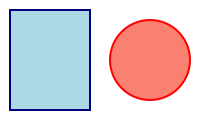

In [ ]:
from IPython.display import SVG, display

svg_str = """
<svg xmlns="http://www.w3.org/2000/svg" width="200" height="120">
  <rect x="10" y="10" width="80" height="100" fill="lightblue" stroke="navy" stroke-width="2"/>
  <circle cx="150" cy="60" r="40" fill="salmon" stroke="red" stroke-width="2"/>
</svg>
"""

display(SVG(svg_str))

---

### 🖊 2. Line + Polygon

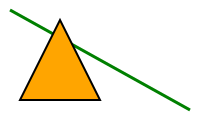

In [ ]:
svg_str = """
<svg xmlns="http://www.w3.org/2000/svg" width="200" height="120">
  <line x1="10" y1="10" x2="190" y2="110" stroke="green" stroke-width="3"/>
  <polygon points="60,20 100,100 20,100" fill="orange" stroke="black" stroke-width="2"/>
</svg>
"""

display(SVG(svg_str))

### 📝 3. Text Example

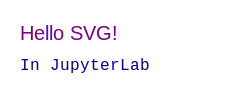

In [ ]:
svg_str = """
<svg xmlns="http://www.w3.org/2000/svg" width="250" height="100">
  <text x="20" y="40" font-family="Arial" font-size="20" fill="purple">Hello SVG!</text>
  <text x="20" y="70" font-family="Courier New" font-size="16" fill="darkblue">In JupyterLab</text>
</svg>
"""

display(SVG(svg_str))

### 🌈 4. Gradient Fill

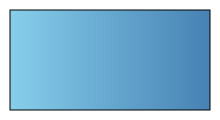

In [ ]:
svg_str = """
<svg xmlns="http://www.w3.org/2000/svg" width="220" height="120">
  <defs>
    <linearGradient id="grad" x1="0%" y1="0%" x2="100%" y2="0%">
      <stop offset="0%" style="stop-color:skyblue; stop-opacity:1" />
      <stop offset="100%" style="stop-color:steelblue; stop-opacity:1" />
    </linearGradient>
  </defs>
  <rect x="10" y="10" width="200" height="100" fill="url(#grad)" stroke="black"/>
</svg>
"""

display(SVG(svg_str))

### 🔄 5. Simple Animation

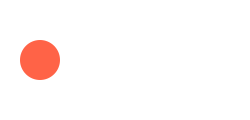

In [ ]:
svg_str = """
<svg xmlns="http://www.w3.org/2000/svg" width="250" height="120">
  <circle cx="40" cy="60" r="20" fill="tomato">
    <animate attributeName="cx" from="40" to="200" dur="2s" repeatCount="indefinite" />
  </circle>
</svg>
"""

display(SVG(svg_str))

### 🔄 6. Bouncing Ball

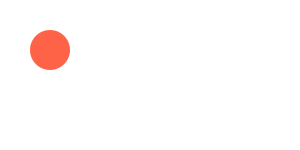

In [ ]:
from IPython.display import SVG, display

svg_bounce = """
<svg xmlns="http://www.w3.org/2000/svg" width="300" height="150">
  <circle cx="50" cy="50" r="20" fill="tomato">
    <animate attributeName="cy" values="50;120;50" dur="1s" repeatCount="indefinite"/>
    <animate attributeName="cx" values="50;250;50" dur="2s" repeatCount="indefinite"/>
  </circle>
</svg>
"""

display(SVG(svg_bounce))

### 🌈 7. Color-Changing Circle

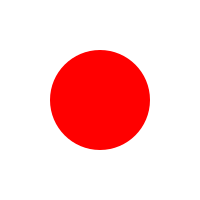

In [ ]:
svg_color = """
<svg xmlns="http://www.w3.org/2000/svg" width="200" height="200">
  <circle cx="100" cy="100" r="50" fill="red">
    <animate attributeName="fill" values="red;blue;green;purple;red" dur="4s" repeatCount="indefinite"/>
  </circle>
</svg>
"""

display(SVG(svg_color))

### 📊 8. Growing Bar Graph

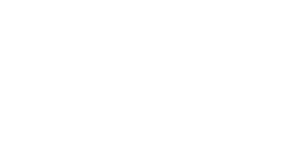

In [ ]:
svg_bar = """
<svg xmlns="http://www.w3.org/2000/svg" width="300" height="150">
  <rect x="30" y="100" width="40" height="0" fill="steelblue">
    <animate attributeName="height" from="0" to="80" dur="1s" fill="freeze"/>
    <animate attributeName="y" from="100" to="20" dur="1s" fill="freeze"/>
  </rect>
  <rect x="100" y="100" width="40" height="0" fill="orange">
    <animate attributeName="height" from="0" to="60" dur="1.5s" fill="freeze"/>
    <animate attributeName="y" from="100" to="40" dur="1.5s" fill="freeze"/>
  </rect>
  <rect x="170" y="100" width="40" height="0" fill="tomato">
    <animate attributeName="height" from="0" to="100" dur="2s" fill="freeze"/>
    <animate attributeName="y" from="100" to="0" dur="2s" fill="freeze"/>
  </rect>
</svg>
"""

display(SVG(svg_bar))

### 🌀 9. Rotating Loader (Spinner)

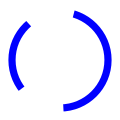

In [ ]:
svg_spinner = """
<svg xmlns="http://www.w3.org/2000/svg" width="120" height="120" viewBox="0 0 100 100">
  <circle cx="50" cy="50" r="40" stroke="blue" stroke-width="6" fill="none" stroke-dasharray="60 40">
    <animateTransform attributeName="transform" type="rotate" from="0 50 50" to="360 50 50" dur="1s" repeatCount="indefinite"/>
  </circle>
</svg>
"""

display(SVG(svg_spinner))

### 🌟 10. Star Path Glow Animation

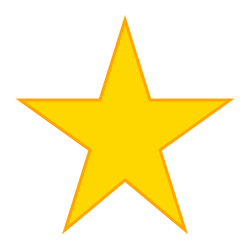

In [ ]:
svg_star = """
<svg xmlns="http://www.w3.org/2000/svg" width="250" height="250">
  <polygon points="125,20 150,100 230,100 160,150 185,230 125,180 65,230 90,150 20,100 100,100"
           fill="gold" stroke="orange" stroke-width="3">
    <animate attributeName="fill" values="gold;yellow;orange;gold" dur="3s" repeatCount="indefinite"/>
    <animate attributeName="stroke-width" values="3;6;3" dur="2s" repeatCount="indefinite"/>
  </polygon>
</svg>
"""

display(SVG(svg_star))